## Sensor Level TFR

In [2]:
# We start by importing the relevant packages
import osl_ephys
import numpy as np
import mne
import glob
import yaml
import os
import matplotlib.pyplot as plt

# Set global font to Open Sans
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Helvetica']
plt.rcParams['font.size'] = 12  # Adjust font size as desired

In [3]:
subject = 'seamus'

In [4]:
# Load the data
output_dir = 'BIDS/derivatives/preprocessing/sub-{}/ses-001/meg'.format(subject)
output_file = 'sub-{}_ses-001_task-fourMotor_run-001_clean.fif'.format(subject)

# Create the directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# # Save the clean data
clean = raw = mne.io.read_raw_fif(os.path.join(output_dir, output_file),preload=True)

Opening raw data file BIDS/derivatives/preprocessing/sub-seamus/ses-001/meg/sub-seamus_ses-001_task-fourMotor_run-001_clean.fif...


/var/folders/lc/2w90j0s17cx3s8fl2m6h2gz80000gn/T/ipykernel_36684/3736465023.py:9: RuntimeWarning: This filename (BIDS/derivatives/preprocessing/sub-seamus/ses-001/meg/sub-seamus_ses-001_task-fourMotor_run-001_clean.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  clean = raw = mne.io.read_raw_fif(os.path.join(output_dir, output_file),preload=True)


    Read a total of 8 projection items:
        HFC: l=1 m=-1 (1 x 178) active
        HFC: l=1 m=0 (1 x 178) active
        HFC: l=1 m=1 (1 x 178) active
        HFC: l=2 m=-2 (1 x 178) active
        HFC: l=2 m=-1 (1 x 178) active
        HFC: l=2 m=0 (1 x 178) active
        HFC: l=2 m=1 (1 x 178) active
        HFC: l=2 m=2 (1 x 178) active
    Range : 0 ... 439756 =      0.000 ...  1465.853 secs
Ready.
Reading 0 ... 439756  =      0.000 ...  1465.853 secs...


## Epoch

In [5]:
# Load events from .npy file
events = np.load('events.npy')
event_id = {'left_arm': 1, 'left_leg': 2, 'right_arm': 3, 'right_leg': 4}
epochs = mne.Epochs(clean, events, event_id = event_id, tmin=-3, tmax=7,preload=True,event_repeated='drop')

Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Not setting metadata
181 matching events found
Setting baseline interval to [-3.0, 0.0] s
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 8)
8 projection items activated
Using data from preloaded Raw for 181 events and 3001 original time points ...
7 bad epochs dropped


In [ ]:
# Just get Z channels
epochs_Z = epochs.copy().pick(Z_picks,exclude="bads")

In [ ]:
# Left vs. Right Trials
left = epochs_Z['left_arm','left_leg']
right = epochs_Z['right_arm','right_leg']

In [ ]:
# TFR
freqs = np.arange(4, 46, 1)  # Generate frequencies from 6 to 45 Hz in 1 Hz steps
n_cycles = freqs / 2.0  # different number of cycle per frequency

power_L, itc = left.compute_tfr(
    method="morlet",
    freqs=freqs,
    n_cycles=n_cycles,
    average=True,
    return_itc=True,
    decim=3,
)

power_R, itc = right.compute_tfr(
    method="morlet",
    freqs=freqs,
    n_cycles=n_cycles,
    average=True,
    return_itc=True,
    decim=3,
)

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.7s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.7s


Applying baseline correction (mode: percent)


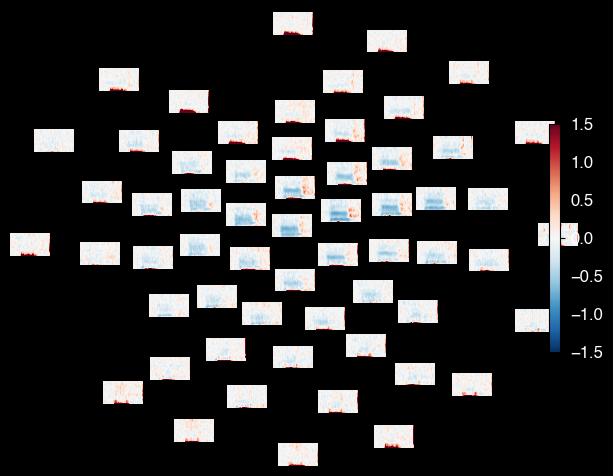

In [ ]:
power_L.plot_topo(fmin=8,fmax = 50,baseline=(-1.5, 0), mode="percent",tmin=-1,
                  vmin=-1.5,vmax=1.5)


No baseline correction applied


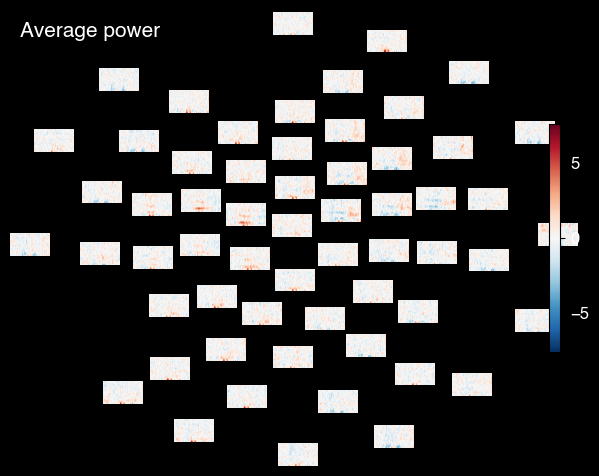

In [ ]:
# Compute dB contrast
power_db = power_L.copy()
power_db.data = 10 * np.log10(power_L.data / power_R.data)
power_db.plot_topo(fmin=6,fmax = 50, tmin=-1, title="Average power")



In [ ]:
power.plot_topo(fmin=6,fmax = 50,baseline=(-2, 0), mode="percent", title="Average power")


NameError: name 'power' is not defined